In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

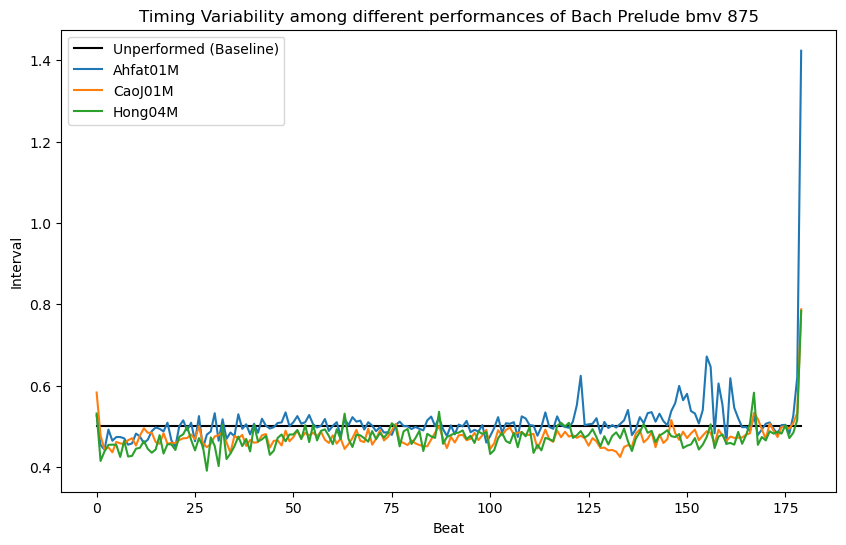

In [30]:
def read_annotations(file_path):
    with open(file_path, 'r') as file:
        data = np.loadtxt(file, usecols=(0,))
        return data

def calculate_timing_intervals(annotations):
    return np.diff(annotations)

def visualize_timing_variations(unperformed_annotations, performed_annotations, performers):
    unperformed_intervals = calculate_timing_intervals(unperformed_annotations)

    plt.figure(figsize=(10, 6))
    plt.plot(unperformed_intervals, label='Unperformed (Baseline)', color='black')

    for i, performed in enumerate(performed_annotations):
        performed_intervals = calculate_timing_intervals(performed)
        plt.plot(performed_intervals, label=performers[i])

    plt.xlabel('Beat')
    plt.ylabel('Interval')
    plt.title('Timing Variability among different performances of Bach Prelude bmv 875')
    plt.legend()
    plt.show()


def main():

    unperformed_path = "Data/Bach/Prelude/bwv_875/midi_score_annotations.txt"
    performer_paths = [
        ("Data/Bach/Prelude/bwv_875/Ahfat01M_annotations.txt"),
        ("Data/Bach/Prelude/bwv_875/CaoJ01M_annotations.txt"),
        ("Data/Bach/Prelude/bwv_875/Hong04M_annotations.txt")
    ]
    performers = ["Ahfat01M", "CaoJ01M", "Hong04M"]


    unperformed_annotations = read_annotations(unperformed_path)
    performed_annotations = [read_annotations(path) for path in performer_paths]


    visualize_timing_variations(unperformed_annotations, performed_annotations, performers)

if __name__ == "__main__":
    main()


Timing Variability within Fugue:
Number of pieces: 84
Mean standard deviation: 11.996101441018048
Median standard deviation: 9.417697769749145

Timing Variability within Prelude:
Number of pieces: 82
Mean standard deviation: 10.56261858504478
Median standard deviation: 6.9559624069765285
T-test Results:
t-statistic: 0.9557788997705
p-value: 0.3405906966290486
There is no statistically significant difference in timing variability.


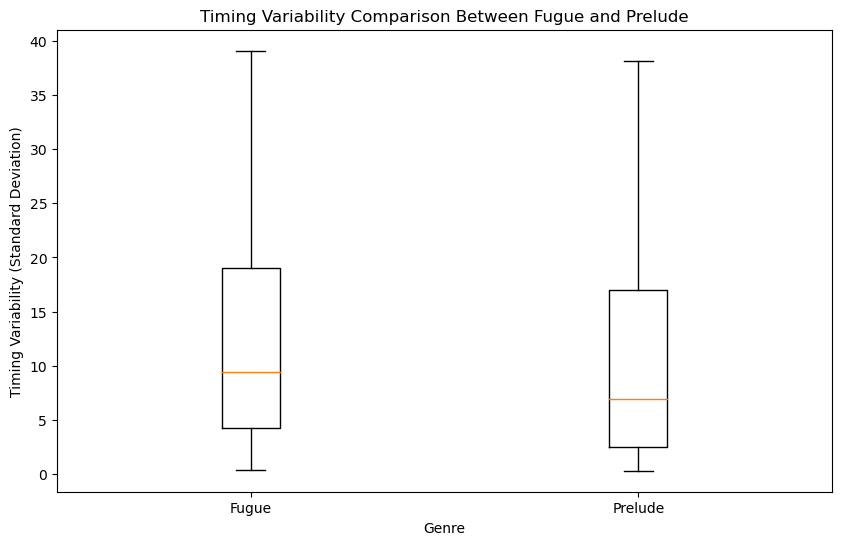

In [39]:
def perform_t_test(a_variability, b_variability):
    t_statistic, p_value = ttest_ind(a_variability, b_variability)
    return t_statistic, p_value

def calculate_timing_deviations(unperformed, performed):
    if len(unperformed) != len(performed):
        return [0]  # Skip this pair if lengths are different
    return performed - unperformed

def calculate_standard_deviation(deviations):
    if len(deviations)==1:
        return 0
    else:
        return np.std(deviations)

def measure_genre_variability(genre_folder):
    pieces = os.listdir(genre_folder)
    timing_variability = []

    for piece in pieces:
        piece_folder = os.path.join(genre_folder, piece)
        unperformed_path = os.path.join(piece_folder, 'midi_score_annotations.txt')
        unperformed_annotations = read_annotations(unperformed_path)
        
        performed_files = [f for f in os.listdir(piece_folder) if f.endswith('_annotations.txt') and not f.startswith('midi_score')]
        for performed_file in performed_files:
            performed_path = os.path.join(piece_folder, performed_file)
            performed_annotations = read_annotations(performed_path)
            
            deviations = calculate_timing_deviations(unperformed_annotations, performed_annotations)
            std_deviation = calculate_standard_deviation(deviations)
            timing_variability.append(std_deviation)

    return timing_variability

def visualize_genre_variability(fugue_variability, prelude_variability):
    plt.figure(figsize=(10, 6))
    plt.boxplot([fugue_variability, prelude_variability], labels=['Fugue', 'Prelude'])
    plt.xlabel('Genre')
    plt.ylabel('Timing Variability (Standard Deviation)')
    plt.title('Timing Variability Comparison Between Fugue and Prelude')
    plt.show()

def interpret_t_test(p_value, alpha=0.05):
    if p_value < alpha:
        print("The difference in timing variability is statistically significant.")
    else:
        print("There is no statistically significant difference in timing variability.")

def main():
    fugue_folder = "Data/Bach/Fugue"
    prelude_folder = "Data/Bach/Prelude"

    fugue_variability = measure_genre_variability(fugue_folder)
    prelude_variability = measure_genre_variability(prelude_folder)

    print("Timing Variability within Fugue:")
    print(f"Number of pieces: {len(fugue_variability)}")
    print(f"Mean standard deviation: {np.mean(fugue_variability)}")
    print(f"Median standard deviation: {np.median(fugue_variability)}")

    print("\nTiming Variability within Prelude:")
    print(f"Number of pieces: {len(prelude_variability)}")
    print(f"Mean standard deviation: {np.mean(prelude_variability)}")
    print(f"Median standard deviation: {np.median(prelude_variability)}")

    t_statistic, p_value = perform_t_test(fugue_variability, prelude_variability)

    print("T-test Results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)
    interpret_t_test(p_value)

    visualize_genre_variability(fugue_variability, prelude_variability)

if __name__ == "__main__":
    main()


Timing Variability within Bach:
Number of pieces: 169
Mean standard deviation: 11.575418786666772
Median standard deviation: 8.507678260884084

Timing Variability within Beethoven:
Number of pieces: 271
Mean standard deviation: 8.880320776456221
Median standard deviation: 6.3631295830060814
T-test Results:
t-statistic: 3.005472985316628
p-value: 0.0028040101197882683
The difference in timing variability is statistically significant.


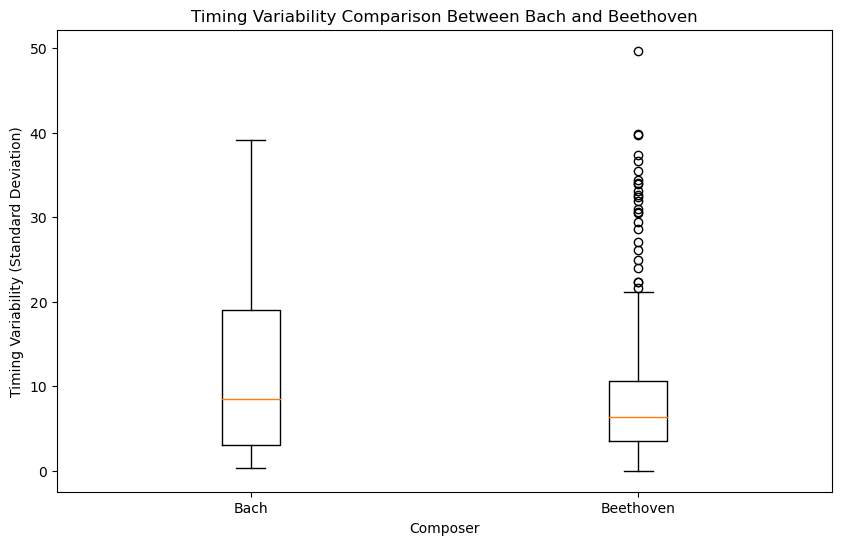

In [47]:
def measure_composer_variability(style_folder):
    pieces = []
    for root, dirs, files in os.walk(style_folder):
        for file in files:
            if file.endswith("midi_score_annotations.txt"):
                unperformed_path = os.path.join(root, file)
                unperformed_annotations = read_annotations(unperformed_path)
                
                performed_files = [f for f in files if f.endswith('_annotations.txt') and not f.startswith('midi_score')]
                for performed_file in performed_files:
                    performed_path = os.path.join(root, performed_file)
                    performed_annotations = read_annotations(performed_path)
                    
                    deviations = calculate_timing_deviations(unperformed_annotations, performed_annotations)
                    piece_std_deviation = calculate_standard_deviation(deviations)
                    pieces.append(piece_std_deviation)
    return pieces

def visualize_composer_variability(fugue_variability, prelude_variability):
    plt.figure(figsize=(10, 6))
    plt.boxplot([fugue_variability, prelude_variability], labels=['Bach', 'Beethoven'])
    plt.xlabel('Composer')
    plt.ylabel('Timing Variability (Standard Deviation)')
    plt.title('Timing Variability Comparison Between Bach and Beethoven')
    plt.show()

def main():
    bach_folder = "Data/Bach"
    beethoven_folder = "Data/Beethoven"

    bach_variability = measure_composer_variability(bach_folder)
    #print(bach_variability)
    beethoven_variability = measure_composer_variability(beethoven_folder)
    #print(beethoven_variability)


    print("Timing Variability within Bach:")
    print(f"Number of pieces: {len(bach_variability)}")
    print(f"Mean standard deviation: {np.mean(bach_variability)}")
    print(f"Median standard deviation: {np.median(bach_variability)}")

    print("\nTiming Variability within Beethoven:")
    print(f"Number of pieces: {len(beethoven_variability)}")
    print(f"Mean standard deviation: {np.mean(beethoven_variability)}")
    print(f"Median standard deviation: {np.median(beethoven_variability)}")

    t_statistic, p_value = perform_t_test(bach_variability, beethoven_variability)

    print("T-test Results:")
    print("t-statistic:", t_statistic)
    print("p-value:", p_value)

    interpret_t_test(p_value)

    visualize_composer_variability(bach_variability, beethoven_variability)

if __name__ == "__main__":
    main()
